### Crops Production Indicators

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [2]:
crops_production_indicators = pd.read_csv("../Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
crops_production_indicators.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [3]:
# Checking for missing values
missing_values = crops_production_indicators.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                41649
dtype: int64


In [4]:
# Handling missing values if any
crops_production_indicators_cleaned = crops_production_indicators.dropna(axis=0).reset_index(drop=True)
crops_production_indicators_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note


In [5]:
# Handling missing values if any
crops_production_indicators_cleaned = crops_production_indicators.dropna(axis=1).reset_index(drop=True)
crops_production_indicators_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41644,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2018,2018,100 g/ha,66518,E,Estimated value
41645,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2019,2019,100 g/ha,64830,E,Estimated value
41646,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2020,2020,100 g/ha,65628,E,Estimated value
41647,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2021,2021,100 g/ha,66126,E,Estimated value


### Converting Categorial colunm to numbers

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in crops_production_indicators_cleaned.columns:
    if crops_production_indicators_cleaned[col].dtype == 'object':
        crops_production_indicators_cleaned[col] = label_encoder.fit_transform(crops_production_indicators_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(crops_production_indicators_cleaned), columns=crops_production_indicators_cleaned.columns)


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in crops_production_indicators_cleaned.columns:
    if crops_production_indicators_cleaned[col].dtype == 'object':
        crops_production_indicators_cleaned[col] = label_encoder.fit_transform(crops_production_indicators_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(crops_production_indicators_cleaned), columns=crops_production_indicators_cleaned.columns)

In [8]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.005932,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,0.0,0.007406,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0.012285,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.136364,0.0,0.010727,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.181818,0.0,0.009820,0.0,1.0


### Model Training and Evaluation

In [10]:

# Select relevant features
selected_features = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',	'Year',	'Unit',	'Value', 'Flag', 'Flag Description']
crops_production_indicators_selected = df_normalized[selected_features]


In [11]:
# Split the dataset into features (X) and target variable (y)
X = crops_production_indicators_selected[['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Flag', 'Flag Description']]
y = crops_production_indicators_selected['Value']


In [12]:
X.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.136364,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.181818,0.0,0.0,1.0


In [13]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

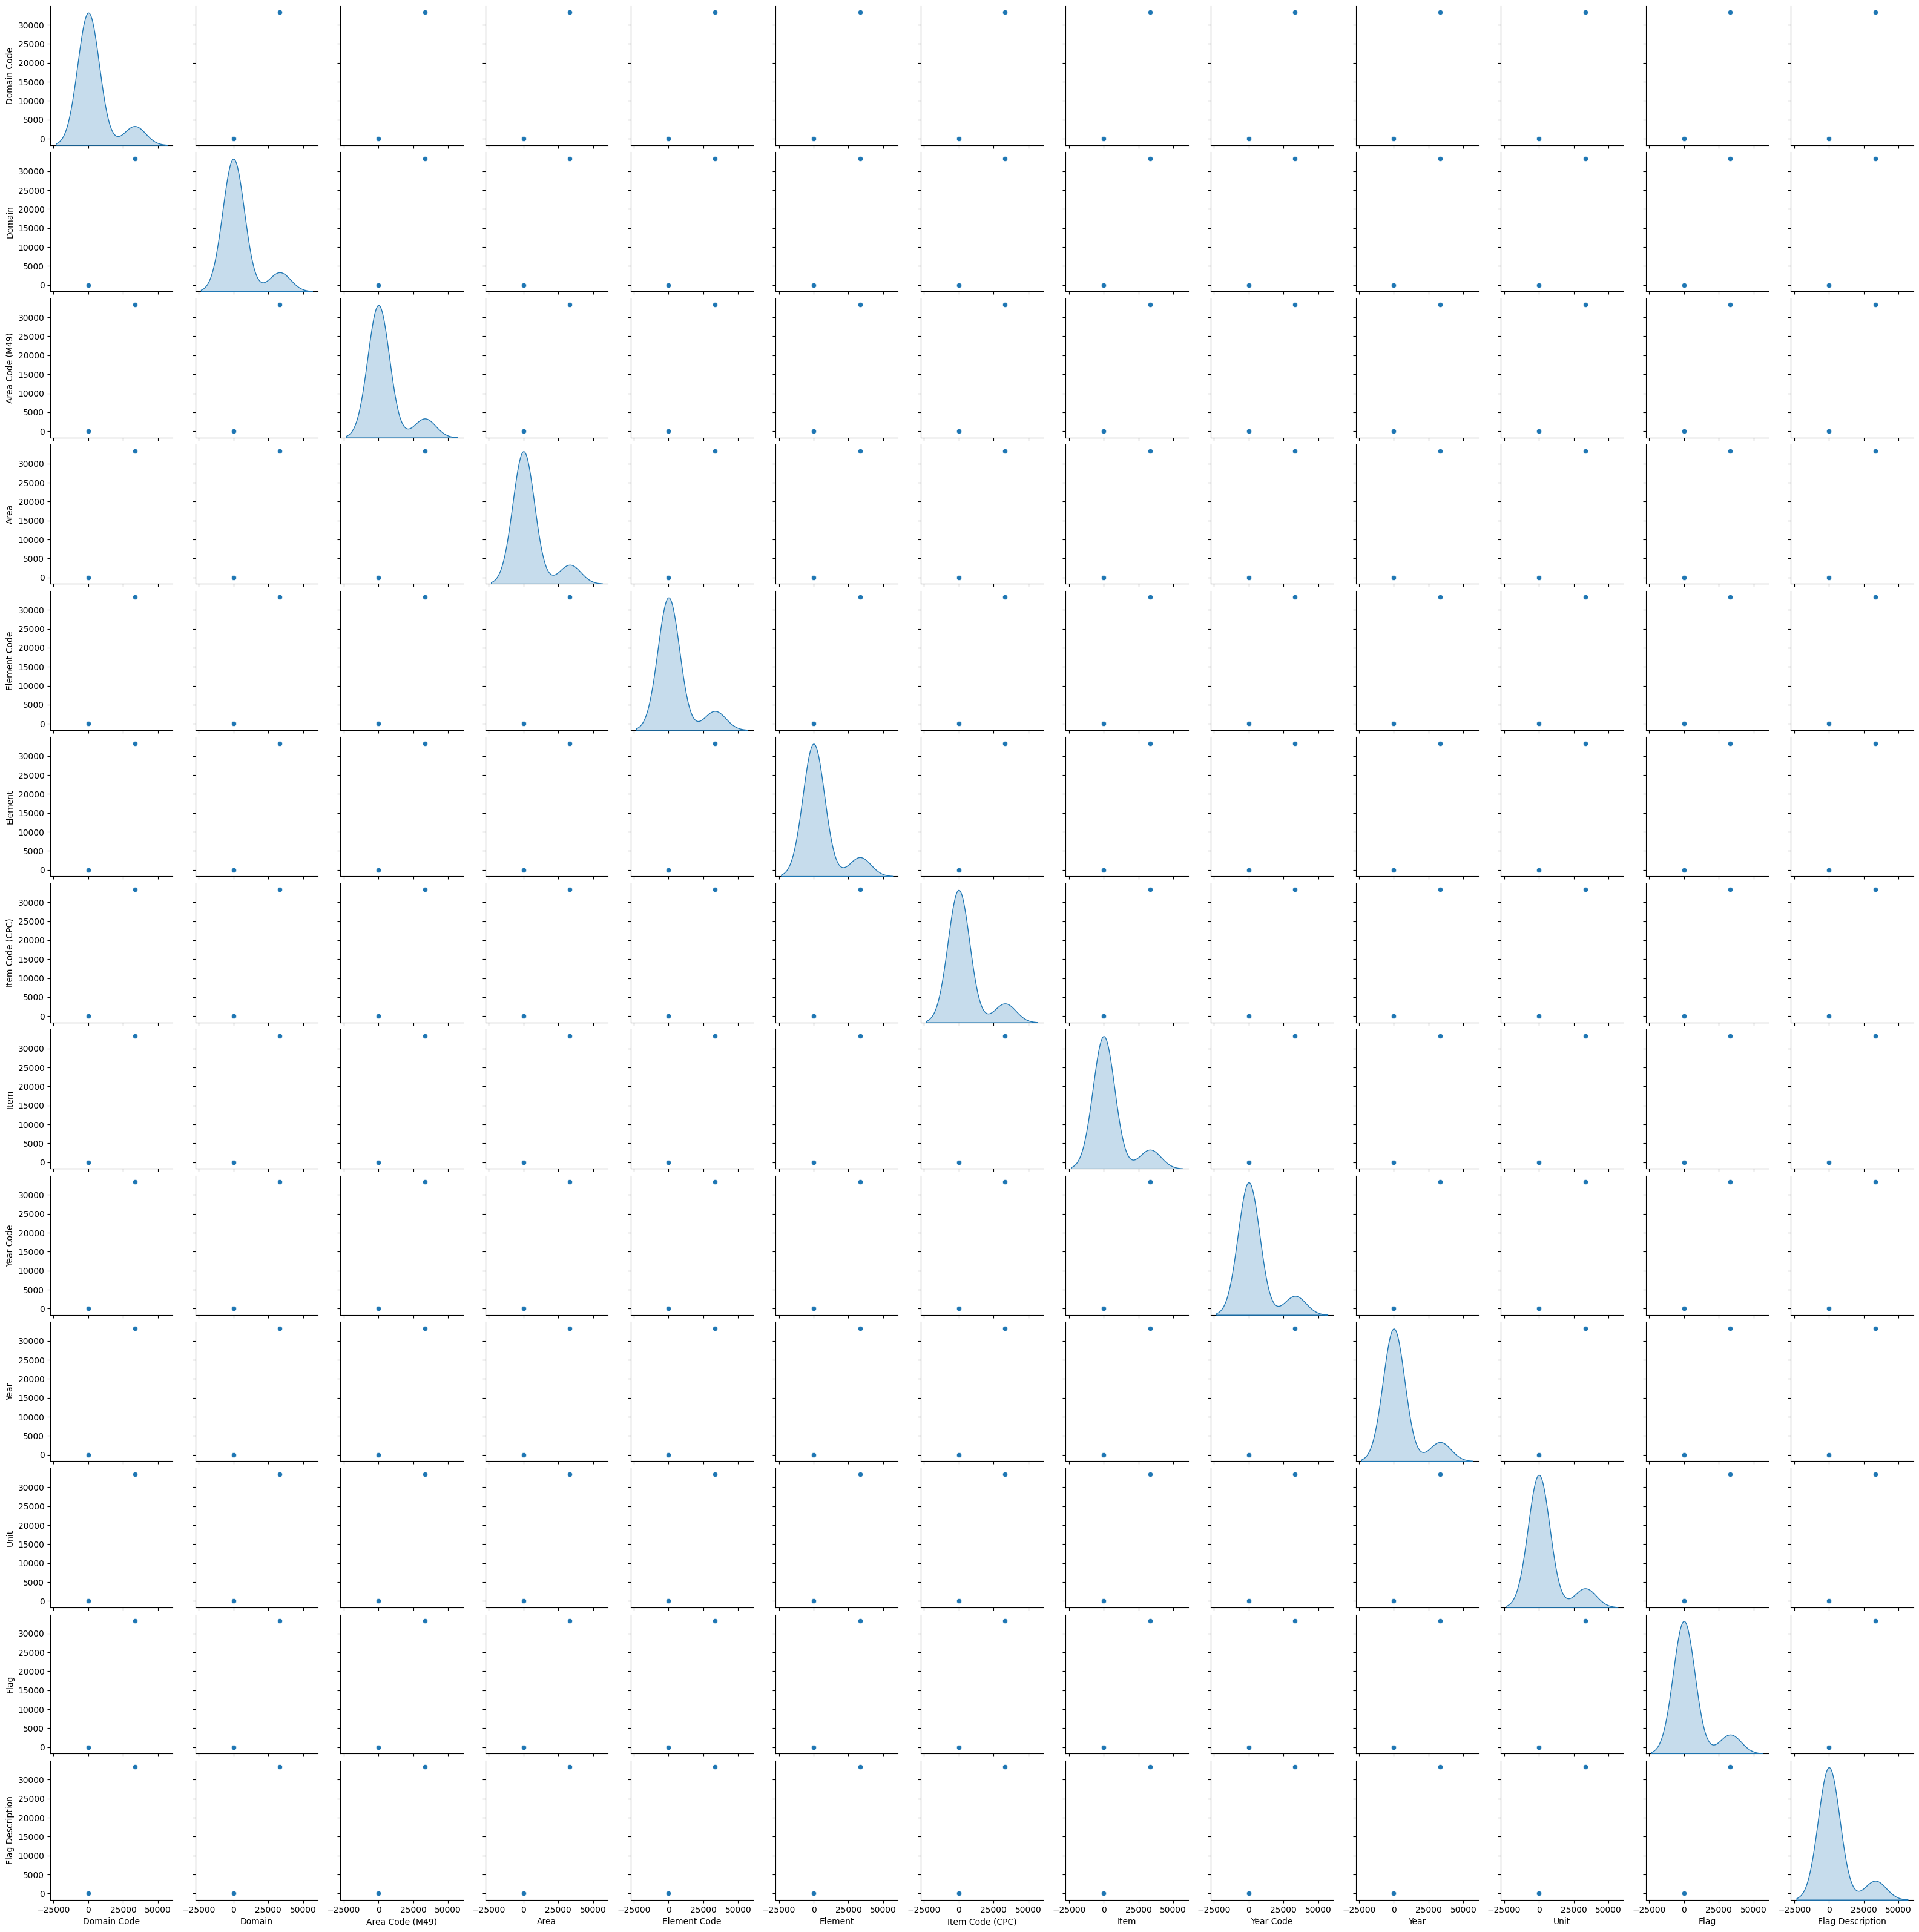

In [14]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [15]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 0.011902194723122627
Linear Regression Mean Absolute Error: 0.06978035828341163


In [17]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 0.003884298851361141
MLP Regression Mean Absolute Error: 0.034972768427543405


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

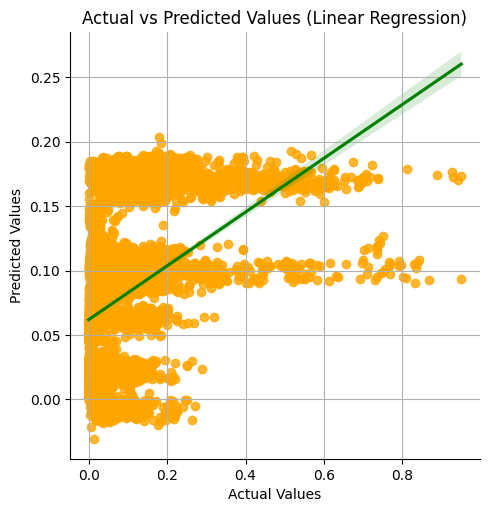

<Figure size 1000x600 with 0 Axes>

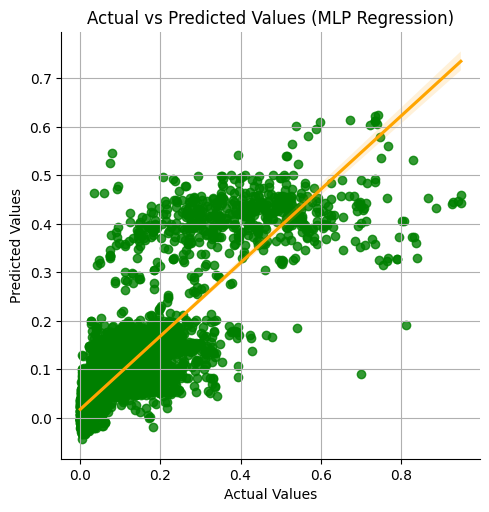

In [18]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


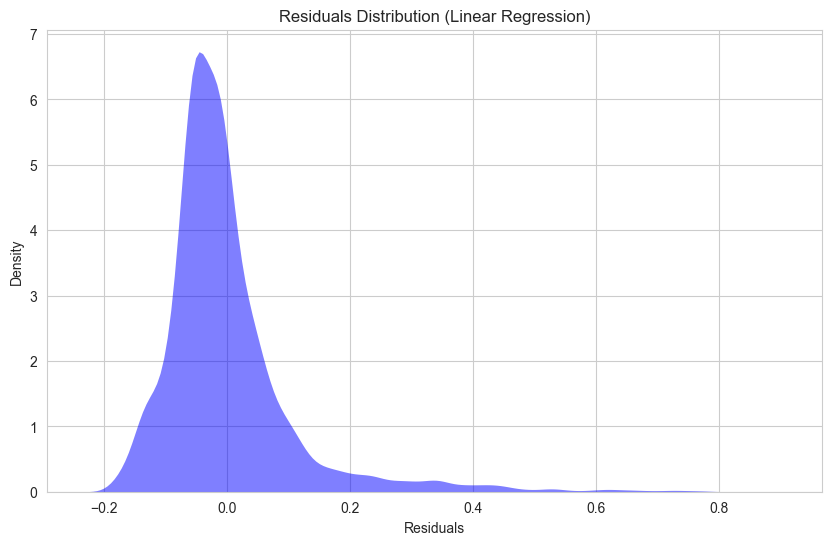

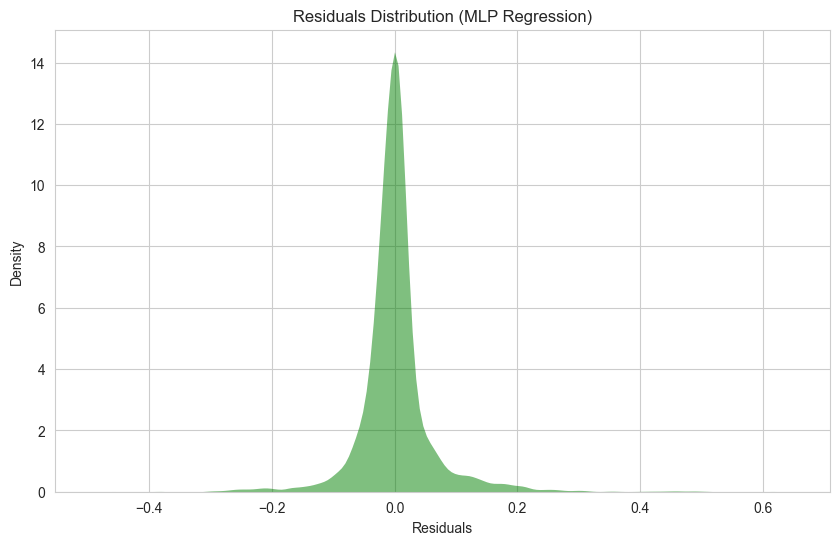

In [21]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.10934778 0.11392183 0.11173463 0.10775585 0.1138801 ]
Linear Regression Mean RMSE: 0.11132803663352457
MLP Cross-Validation RMSE Scores: [0.06676324 0.06785136 0.06832525 0.0648311  0.06835741]
MLP Mean RMSE: 0.06722567038412523


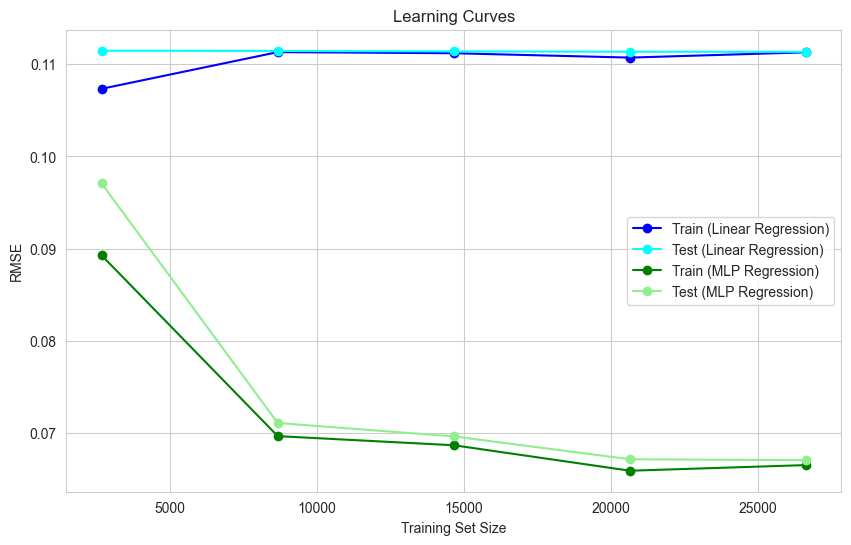

In [22]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.005932,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.045455,0.0,0.007406,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0.012285,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.136364,0.0,0.010727,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.181818,0.0,0.009820,0.0,1.0


In [24]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.005932,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.007406,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.012285,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.0,0.010727,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.009820,0.0,1.0


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [25]:
area_column = crops_production_indicators[['Area', 'Year Code']]

crops_production_indicators_area_concat = pd.concat([df_normalized, area_column], axis=1)

crops_production_indicators_area_concat.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.005932,0.0,1.0,Afghanistan,2000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.007406,0.0,1.0,Afghanistan,2001
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.012285,0.0,1.0,Afghanistan,2002
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.0,0.010727,0.0,1.0,Afghanistan,2003
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.009820,0.0,1.0,Afghanistan,2004


### Model Deployment

In [27]:
# Train a separate model for each geographical region and save them
regions = crops_production_indicators_area_concat['Area'].unique()
for region in regions:
    region_data = crops_production_indicators_area_concat[crops_production_indicators_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_crops_production_indicators/model_crops_production_indicators_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Afghanistan.joblib
Model for Albania saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Albania.joblib
Model for Algeria saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Algeria.joblib
Model for Angola saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Angola.joblib
Model for Antigua and Barbuda saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Antigua and Barbuda.joblib
Model for Argentina saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Argentina.joblib
Model for Armenia saved as ../model_deployment/model_crops_production_indicators/model_crops_production_indicators_Armenia.joblib
Model for Australia saved as ../model_deployment/model_c

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025         12.701903
1  2026         12.708154
2  2027         12.714406

Forecast for Albania:
   Year  Forecasted_Value
0  2025        118.944728
1  2026        119.003441
2  2027        119.062153

Forecast for Algeria:
   Year  Forecasted_Value
0  2025         87.688782
1  2026         87.732069
2  2027         87.775355

Forecast for Angola:
   Year  Forecasted_Value
0  2025         27.817251
1  2026         27.830961
2  2027         27.844672

Forecast for Antigua and Barbuda:
   Year  Forecasted_Value
0  2025         -4.023883
1  2026         -4.025882
2  2027         -4.027880

Forecast for Argentina:
   Year  Forecasted_Value
0  2025        -26.834495
1  2026        -26.847801
2  2027        -26.861107

Forecast for Armenia:
   Year  Forecasted_Value
0  2025         24.182742
1  2026         24.194653
2  2027         24.206564

Forecast for Australia:
   Year  Forecasted_Value
0  2025         15.857664
1  2026         15

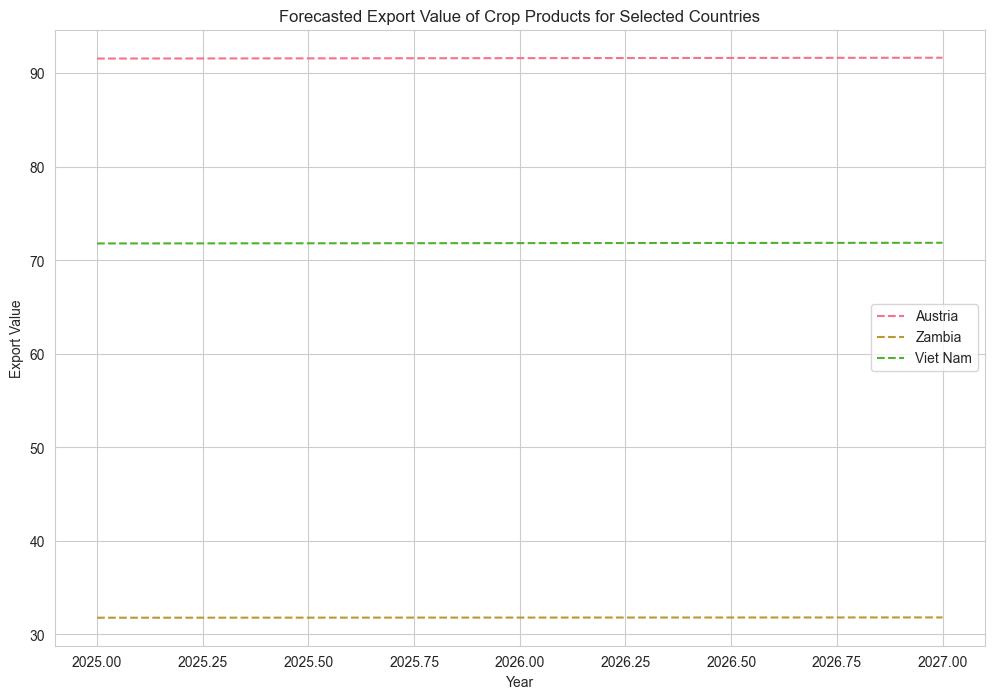

In [28]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_crops_production_indicators/model_crops_production_indicators_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = crops_production_indicators_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Austria', 'Zambia', 'Viet Nam']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()
